In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from sklearn.preprocessing import LabelEncoder
import random

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/DO_AN


Using TensorFlow backend.


In [2]:
df = np.array(pd.read_csv('data.csv'))
g = np.random.permutation(df)

x_train = g[:3000,1:5]
y_train = g[:3000,5]
x_val = g[3000:4000, 1:5]
y_val = g[3000:4000, 5]

x_test = g[4000:,1:5]
y_test = g[4000:,5]

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y_train)
Y_train = pd.get_dummies(y1).values

y2 = encoder.fit_transform(y_val)
Y_val = pd.get_dummies(y2).values

y3= encoder.fit_transform(y_test)
Y_test = pd.get_dummies(y3).values

[0 0 0 ... 1 1 1]
[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
(1000, 2)
(787, 2)


In [0]:
model = Sequential()
model.add(Dense(32, input_shape=(4,)))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(lr=1e-4,decay=1e-7),'binary_crossentropy', ['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_22 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_11 (Batc (None, 64)                256       
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_12 (Batc (None, 64)                256       
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 130       
Total params: 7,074
Trainable params: 6,818
Non-trainable params: 256
__________________________________________________

In [0]:
H = model.fit(x_train, Y_train, epochs = 100, validation_data = (x_val, Y_val))

Train on 3000 samples, validate on 1000 samples
Epoch 1/100
3000/3000 [==============================] - 2s 620us/step - loss: 0.4274 - acc: 0.8263 - val_loss: 0.3232 - val_acc: 0.9180
Epoch 2/100
3000/3000 [==============================] - 0s 85us/step - loss: 0.2364 - acc: 0.9255 - val_loss: 0.2766 - val_acc: 0.9070
Epoch 3/100
3000/3000 [==============================] - 0s 84us/step - loss: 0.1968 - acc: 0.9340 - val_loss: 0.2630 - val_acc: 0.9040
Epoch 4/100
3000/3000 [==============================] - 0s 85us/step - loss: 0.1713 - acc: 0.9440 - val_loss: 0.2437 - val_acc: 0.9090
Epoch 5/100
3000/3000 [==============================] - 0s 87us/step - loss: 0.1482 - acc: 0.9543 - val_loss: 0.2686 - val_acc: 0.8835
Epoch 6/100
3000/3000 [==============================] - 0s 82us/step - loss: 0.1324 - acc: 0.9555 - val_loss: 0.1725 - val_acc: 0.9335
Epoch 7/100
3000/3000 [==============================] - 0s 80us/step - loss: 0.1296 - acc: 0.9580 - val_loss: 0.1477 - val_acc: 0.9490

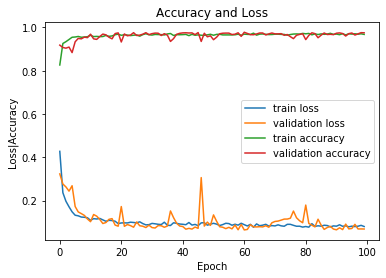

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure()
numOfEpoch = 100
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='train loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['acc'], label='train accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_acc'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [0]:
scores = model.evaluate(x_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

787/787 [==============================] - 0s 46us/step
Test loss: 0.0586945895422747
Test accuracy: 0.9815756035578145


In [0]:
model.save('model1.h5')

In [0]:
import os
import rasterio
import numpy as np
import csv
import pandas as pd

X = []
image_list = os.listdir('img')
for image in image_list:
    with rasterio.open('img/{}'.format(image)) as src:
        X.append(src.read())

X = np.array(X)
X = np.reshape(X,(4,608,552))

A = []
for i in range(4):
    A.append(X[i].flatten())
A = np.array(A)
B = A.T
print(B)

[[1082 1030  671 2866]
 [1076 1021  672 2840]
 [1064 1029  674 2882]
 ...
 [1197 1166 1030 2621]
 [1199 1167 1079 2280]
 [1244 1175 1129 1935]]


In [0]:
from keras.models import load_model
model = load_model('model.h5')

z = model.predict(B)
print(z)
z = (z <= 0.5).astype(np.uint8)
z = np.argmax(z, axis=-1)

[[0.9811167  0.02748951]
 [0.97825503 0.03187928]
 [0.9914547  0.01326951]
 ...
 [0.01806021 0.9773223 ]
 [0.01930636 0.9713877 ]
 [0.00597021 0.9934218 ]]


(1, 608, 552)


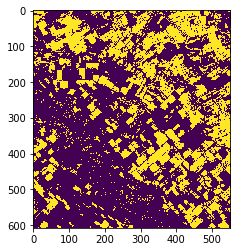

In [0]:
import matplotlib.pyplot as plt

k = z.reshape(608,552,1).transpose(2,0,1)
print(k.shape)
plt.imshow(k[0])

In [0]:
profiles = []
image_list = os.listdir('img')
for image in image_list:
    with rasterio.open('img/{}'.format(image)) as src:
        profile = src.profile
        profile.update(
            dtype=rasterio.uint8,
            count=1,
            compress='lzw')
    with rasterio.open('result/result_1{}'.format(image),'w',**profile) as dst:
        dst.write(k[0].astype(np.uint8), indexes=1)

In [0]:
X = []
image_list = os.listdir('img')
for image in image_list:
    with rasterio.open('img/{}'.format(image)) as src:
        X.append(src.read())
X = np.array(X).reshape(4,608,552)
A = []
for i in range(4):
    A.append(X[i].flatten())
A = np.array(A).T
model = load_model('model.h5')
z = model.predict(B)
z = (z <= 0.5).astype(np.uint8)
z = np.argmax(z, axis=-1)
k = z.reshape(608,552,1).transpose(2,0,1)
image_list = os.listdir('img')
for image in image_list:
    with rasterio.open('img/{}'.format(image)) as src:
        profile = src.profile
        profile.update(
            dtype=rasterio.uint8,
            count=1,
            compress='lzw')
    with rasterio.open('result/result_1{}'.format(image),'w',**profile) as dst:
        dst.write(k[0].astype(np.uint8), indexes=1)


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pprint

In [0]:
a = cv2.imread('result/result_1img.tif')
a= a*255
plt.imshow(a)

In [0]:
b = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(b, 127, 255, 0)
# ret, thresh = cv2.threshold(a, 127, 255, cv2.THRESH_BINARY)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(ret)
print(thresh)
pprint.pprint(contours)
print(hierarchy.shape)
print(im2)
# nc = cv2.drawContours(im2, contours, -1, (0,255,0), 3)
# plt.imshow(nc)

In [0]:
kernel = np.ones((5,5),np.uint8)
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
opening = cv2.morphologyEx(a, cv2.MORPH_OPEN, kernel)
# closing = cv2.morphologyEx(a, cv2.MORPH_CLOSE, kernel)
plt.imshow(opening)

In [0]:
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)
# opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
# plt.imshow(opening)


In [0]:
b = cv2.cvtColor(closing, cv2.COLOR_BGR2GRAY)
print(b)
# ret, thresh = cv2.threshold(b, 127, 255, 0)
# # ret, thresh = cv2.threshold(b, 127, 255, cv2.THRESH_BINARY)
# im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# print(ret)
# print(thresh)
# # print(contours)
# print(hierarchy.shape)
# print(im2)
# nc = cv2.drawContours(im2, contours, -1, (0,255,0), 3)
# plt.imshow(nc)

In [0]:
profiles = []
image_list = os.listdir('img')
for image in image_list:
    with rasterio.open('img/{}'.format(image)) as src:
        profile = src.profile
        profile.update(
            dtype=rasterio.uint8,
            count=1,
            compress='lzw')
    with rasterio.open('./result/result_2{}'.format(image),'w',**profile) as dst:
        dst.write(b.astype(np.uint8), indexes=1)